In [1]:
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt
from hyperopt import hp, tpe
from scipy.linalg import expm
from qibo import hamiltonians, set_backend, Circuit
from qibo.symbols import *
from qibo.symbols import *
import qibo
from qibo.transpiler.unitary_decompositions import two_qubit_decomposition
qibo.set_backend("numpy")
backend = qibo.backends.NumpyBackend()
np.set_printoptions(precision=3, suppress=True)

/home/marek/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
[Qibo 0.2.19|INFO|2025-06-19 12:00:06]: Using numpy backend on /CPU:0


In [2]:
import qibo
import qibo_client

# create the circuit you want to run
circuit = Circuit(20)


# authenticate to server through the client instance
token = "enter TOKEN HERE"
client = qibo_client.Client(token)

# run the circuit
device = "sinq20"
project = "personal"

https://quantumcomputing.stackexchange.com/questions/3957/minimum-number-of-cnots-for-toffoli-with-non-adjacent-controls

In [3]:
import scipy

def TOFFOLI_circuit_NN(c = None, q0 = 0,q1 = 1,q2 = 2):

    if c is None:
        c = Circuit(3)

    pi = np.pi

    c.add(gates.RX(q0,theta = -pi ))
    c.add(gates.RX(q1,theta = pi/2 ))
    c.add(gates.RZ(q2,theta = pi/2 ))
    c.add(gates.RX(q2,theta = pi/2 ))

    c.add(gates.CZ(q1,q2))

    c.add(gates.RX(q1,theta = -pi ))
    c.add(gates.RX(q2,theta = -pi ))

    c.add(gates.CZ(q0,q1))

    c.add(gates.RX(q0,theta = pi/2 ))
    c.add(gates.RX(q1,theta = pi/2 ))

    c.add(gates.CZ(q0,q1))

    c.add(gates.RZ(q0,theta = -pi/2 ))
    c.add(gates.RX(q0,theta = pi/4 ))
    c.add(gates.RZ(q1,theta = pi/4 ))
    c.add(gates.RX(q1,theta = pi/2 ))

    c.add(gates.CZ(q1,q2))

    c.add(gates.RX(q1,theta = pi/2 ))
    c.add(gates.RX(q2,theta = -pi ))

    c.add(gates.CZ(q0,q1))

    c.add(gates.RZ(q0,theta = -pi ))
    c.add(gates.RX(q0,theta = pi/4 ))
    c.add(gates.RZ(q1,theta = -pi/4 ))
    c.add(gates.RX(q1,theta = pi/2 ))

    c.add(gates.CZ(q0,q1))

    c.add(gates.RZ(q0,theta = -pi ))
    c.add(gates.RX(q0,theta = pi/2 ))
    c.add(gates.RX(q1,theta = pi/2 ))

    c.add(gates.CZ(q1,q2))

    c.add(gates.RX(q1,theta = pi/2 ))
    c.add(gates.RZ(q2,theta = -pi/4 ))
    c.add(gates.RX(q2,theta = pi/2 ))
    c.add(gates.RZ(q2,theta = pi/2 ))

    c.add(gates.CZ(q0,q1))

    c.add(gates.RZ(q0,theta = -pi/2 ))
    c.add(gates.RX(q0,theta = pi/2 ))
    c.add(gates.RZ(q0,theta = -pi/4 ))
    c.add(gates.RZ(q1,theta = -pi/2 ))
    c.add(gates.RX(q1,theta = pi/2 ))
    c.add(gates.RZ(q1,theta = -3*pi/4 ))
    return c

In [4]:
c =TOFFOLI_circuit_NN()
-(c.unitary()*np.exp(1j*5.10645)).real

array([[ 1., -0., -0.,  0., -0.,  0., -0.,  0.],
       [-0.,  1.,  0., -0.,  0.,  0.,  0., -0.],
       [ 0., -0.,  1.,  0.,  0.,  0., -0., -0.],
       [-0.,  0.,  0.,  1., -0.,  0.,  0., -0.],
       [ 0., -0., -0., -0.,  1.,  0.,  0., -0.],
       [-0., -0., -0., -0.,  0.,  1., -0.,  0.],
       [-0.,  0., -0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1., -0.]])

In [5]:
c.draw()

0: ─RX─────────o─RX─o─RZ─RX──────o─RZ─RX─o─RZ─RX────────────o─RZ─RX─RZ─
1: ─RX────o─RX─Z─RX─Z─RZ─RX─o─RX─Z─RZ─RX─Z─RX────o─RX───────Z─RZ─RX─RZ─
2: ─RZ─RX─Z─RX──────────────Z─RX─────────────────Z─RZ─RX─RZ────────────


In [12]:
a = {'c': 1, 3:2}

In [13]:
a['c']

1

In [14]:
a[3]

2

In [17]:
simulation_results = []

def swap_test_run( initial_angle = 1 ):
    
    c_theory = Circuit(3)
    q0=0
    q1=1
    q2=2
    qubit_ids_theory = [q0,q1,q2]
    c_theory.add( gates.RX(q0,initial_angle))
    c_theory.add(gates.H(q2))
    TOFFOLI_circuit_NN(c_theory, q0,q2,q1)
    c_theory.add(gates.H(q2))
    c_theory.add(gates.M(q2))

    # Define the number of measurement shots
    nshots = 1024

    # Execute the circuit with the specified number of shots
    result = c_theory.execute(nshots=nshots)

    # Get the measurement frequencies (counts for each bitstring)
    # The keys will be bitstrings (e.g., '000', '001'), and values will be their counts
    frequencies = result.frequencies()

    # Print the frequencies
    print("Simulated SWAP test")
    print(f"Measurement outcomes after {nshots} shots:")
    print("Frequencies (counts per bitstring):", frequencies)
    
    
    c = Circuit(20)

    q0=3
    q1=13
    q2=8
    q3=17
    qubit_ids_QPU = [q0,q1,q2]
    c.add(gates.RX(q0,initial_angle))

    c.add(gates.H(q2))

    c.add(gates.CNOT(q1,q2))
    TOFFOLI_circuit_NN(c,q0,q2,q1)
    c.add(gates.CNOT(q1,q2))


    c.add(gates.H(q2))

    c.add(gates.M(q2))
    job = client.run_circuit(c, device=device, project=project, nshots=nshots)
    results_QPU = job.result()
    print(results_QPU)
    results_QPU.frequencies()

    
    
    return {'circuit_theory' : c_theory, 'initial_angle' : initial_angle,
            'n_shots' : nshots, 'qubit_ids_theory':[q0,q1,q2], 
            'results_theory' : result, 'results_hardware': results_QPU,
           'circuit_QPU' : c, 'qubit_ids_theory':qubit_ids_theory, 'qubit_ids_QPU' : qubit_ids_QPU 
           }
    

In [18]:
swap_test_run(1)

Simulated SWAP test
Measurement outcomes after 1024 shots:
Frequencies (counts per bitstring): Counter({'0': 1024})


[2025-06-19 12:33:22,603] INFO: Post new circuit on the server
[2025-06-19 12:33:23,628] INFO: Job posted on server with pid f2a6e9974f144d32a24da96dbd302d74
[2025-06-19 12:33:24,460] INFO: Please wait until your job is completed...


{'circuit_theory': <qibo.models.circuit.Circuit at 0x799f25608aa0>,
 'initial_angle': 1,
 'n_shots': 1024,
 'qubit_ids_theory': [0, 1, 2],
 'results_theory': <qibo.result.CircuitResult at 0x799f2658b5f0>,
 'results_hardware': <qibo.result.MeasurementOutcomes at 0x799f265d3170>,
 'circuit_QPU': <qibo.models.circuit.Circuit at 0x799f82312690>,
 'qubit_ids_QPU': [3, 13, 8]}

In [19]:
results = _

In [20]:
results

{'circuit_theory': <qibo.models.circuit.Circuit at 0x799f25608aa0>,
 'initial_angle': 1,
 'n_shots': 1024,
 'qubit_ids_theory': [0, 1, 2],
 'results_theory': <qibo.result.CircuitResult at 0x799f2658b5f0>,
 'results_hardware': <qibo.result.MeasurementOutcomes at 0x799f265d3170>,
 'circuit_QPU': <qibo.models.circuit.Circuit at 0x799f82312690>,
 'qubit_ids_QPU': [3, 13, 8]}

In [21]:
collected_results = [results]

In [25]:
for s in np.linspace(0,3.14,8):
    collected_results.append(swap_test_run(s))

Simulated SWAP test
Measurement outcomes after 1024 shots:
Frequencies (counts per bitstring): Counter({'0': 1024})


[2025-06-19 12:36:41,290] INFO: Post new circuit on the server
[2025-06-19 12:36:42,418] INFO: Job posted on server with pid f564be791f7f4c24aa4e437829f45049
[2025-06-19 12:36:43,247] INFO: Please wait until your job is completed...


Simulated SWAP test
Measurement outcomes after 1024 shots:
Frequencies (counts per bitstring): Counter({'0': 1024})


[2025-06-19 12:37:19,793] INFO: Post new circuit on the server
[2025-06-19 12:37:20,832] INFO: Job posted on server with pid 0423ae35660b49f7800267b4edc14cdc
[2025-06-19 12:37:21,533] INFO: Please wait until your job is completed...


Simulated SWAP test
Measurement outcomes after 1024 shots:
Frequencies (counts per bitstring): Counter({'0': 1024})


[2025-06-19 12:37:58,500] INFO: Post new circuit on the server
[2025-06-19 12:37:59,626] INFO: Job posted on server with pid 3167aff91fdd4c9791b263c8a1b797db
[2025-06-19 12:38:00,347] INFO: Please wait until your job is completed...


Simulated SWAP test
Measurement outcomes after 1024 shots:
Frequencies (counts per bitstring): Counter({'0': 1024})


[2025-06-19 12:38:37,104] INFO: Post new circuit on the server
[2025-06-19 12:38:38,230] INFO: Job posted on server with pid 05a4cf10fd5a4a39980225d69ce8b431
[2025-06-19 12:38:39,062] INFO: Please wait until your job is completed...


Simulated SWAP test
Measurement outcomes after 1024 shots:
Frequencies (counts per bitstring): Counter({'0': 1024})


[2025-06-19 12:39:16,111] INFO: Post new circuit on the server
[2025-06-19 12:39:17,338] INFO: Job posted on server with pid 4743fc1dc7f34b55a62102bc594ff7eb
[2025-06-19 12:39:18,169] INFO: Please wait until your job is completed...


Simulated SWAP test
Measurement outcomes after 1024 shots:
Frequencies (counts per bitstring): Counter({'0': 1024})


[2025-06-19 12:39:48,567] INFO: Post new circuit on the server
[2025-06-19 12:39:49,518] INFO: Job posted on server with pid a84c317c85214a7ababb29c052edfbcb
[2025-06-19 12:39:50,257] INFO: Please wait until your job is completed...


Simulated SWAP test
Measurement outcomes after 1024 shots:
Frequencies (counts per bitstring): Counter({'0': 1024})


[2025-06-19 12:40:14,559] INFO: Post new circuit on the server
[2025-06-19 12:40:15,616] INFO: Job posted on server with pid 8eb9a9964a4346e59486ba477fc1447c
[2025-06-19 12:40:16,332] INFO: Please wait until your job is completed...


Simulated SWAP test
Measurement outcomes after 1024 shots:
Frequencies (counts per bitstring): Counter({'0': 1024})


[2025-06-19 12:40:47,034] INFO: Post new circuit on the server
[2025-06-19 12:40:47,993] INFO: Job posted on server with pid cc81f4197dab47bfb9945c46ae577b46
[2025-06-19 12:40:48,693] INFO: Please wait until your job is completed...


In [34]:
collected_results[2]['results_hardware'].frequencies()['0']

667

In [48]:
statistics_hardware = [ collected_results[i]['results_hardware'].frequencies() for i in range(9)]

In [57]:
fidelities_CPU = [(collected_results[i]['results_theory'].frequencies()['0']/collected_results[i]['n_shots']-1/2)*2 for i in range(9)]
fidelities_QPU = [(collected_results[i]['results_hardware'].frequencies()['0']/collected_results[i]['n_shots']-1/2)*2 for i in range(9)]

In [58]:
fidelities_QPU

[0.318359375,
 0.388671875,
 0.302734375,
 0.31640625,
 0.314453125,
 0.275390625,
 0.1875,
 0.076171875,
 0.052734375]

In [59]:
angles =[collected_results[i]['initial_angle'] for i in range(9)]

Text(0, 0.5, 'fidelity')

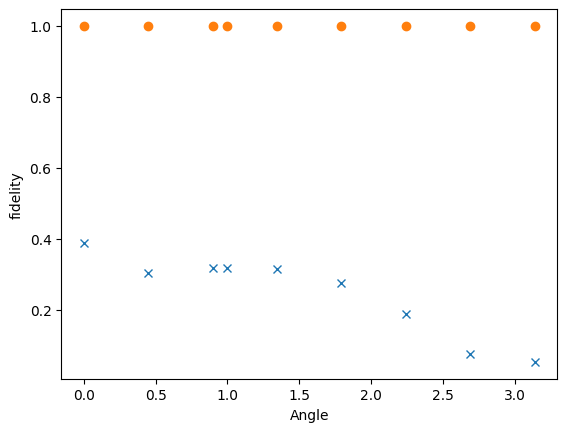

In [60]:
import matplotlib.pyplot as plt
plt.plot(angles, fidelities_QPU, 'x')
plt.plot(angles, fidelities_CPU, 'o')
plt.xlabel('Angle')
plt.ylabel('fidelity')

Above I had a wrong ordering of qubits in the theory swap test and reruning here the CPU data. The function above is corrected but I don't want to waste quota on reruning

In [70]:
simulation_results = []

def swap_test_run( initial_angle = 1 ):
    
    c_theory = Circuit(3)
    q0=0
    q1=1
    q2=2
    qubit_ids_theory = [q0,q1,q2]
    c_theory.add( gates.RX(q0,initial_angle))
    c_theory.add(gates.H(q2))
    TOFFOLI_circuit_NN(c_theory, q0,q2,q1)
    c_theory.add(gates.H(q2))
    c_theory.add(gates.M(q2))

    # Define the number of measurement shots
    nshots = 1024

    # Execute the circuit with the specified number of shots
    result = c_theory.execute(nshots=nshots)

    # Get the measurement frequencies (counts for each bitstring)
    # The keys will be bitstrings (e.g., '000', '001'), and values will be their counts
    frequencies = result.frequencies()

    # Print the frequencies
    print("Simulated SWAP test")
    print(f"Measurement outcomes after {nshots} shots:")
    print("Frequencies (counts per bitstring):", frequencies)
    
    
    c = Circuit(20)

    q0=3
    q1=13
    q2=8
    q3=17
    qubit_ids_QPU = [q0,q1,q2]
    c.add(gates.RX(q0,initial_angle))

    c.add(gates.H(q2))

    c.add(gates.CNOT(q1,q2))
    TOFFOLI_circuit_NN(c,q0,q2,q1)
    c.add(gates.CNOT(q1,q2))


    c.add(gates.H(q2))

    c.add(gates.M(q2))
    #job = client.run_circuit(c, device=device, project=project, nshots=nshots)
    results_QPU = c.execute(nshots=nshots)
    print(results_QPU)
    results_QPU.frequencies()

    
    
    return {'circuit_theory' : c_theory, 'initial_angle' : initial_angle,
            'n_shots' : nshots, 'qubit_ids_theory':[q0,q1,q2], 
            'results_theory' : result, 'results_hardware': results_QPU,
           'circuit_QPU' : c, 'qubit_ids_theory':qubit_ids_theory, 'qubit_ids_QPU' : qubit_ids_QPU 
           }
    

In [71]:
collected_results2 = []
for s in np.linspace(0,3.14,8):
    collected_results2.append(swap_test_run(s))

Simulated SWAP test
Measurement outcomes after 1024 shots:
Frequencies (counts per bitstring): Counter({'0': 1024})
(-0.38268-0.92388j)|00000000000000000000>
Simulated SWAP test
Measurement outcomes after 1024 shots:
Frequencies (counts per bitstring): Counter({'0': 1005, '1': 19})
(-0.3731-0.90074j)|00000000000000000000> + (-0.10274+0.04256j)|00010000000000000000> + (-0.10274+0.04256j)|00010000000001000000> + (-0.10274+0.04256j)|00010000100000000000> + (-0.10274+0.04256j)|00010000100001000000>
Simulated SWAP test
Measurement outcomes after 1024 shots:
Frequencies (counts per bitstring): Counter({'0': 924, '1': 100})
(-0.34482-0.83248j)|00000000000000000000> + (-0.20033+0.08298j)|00010000000000000000> + (-0.20033+0.08298j)|00010000000001000000> + (-0.20033+0.08298j)|00010000100000000000> + (-0.20033+0.08298j)|00010000100001000000>
Simulated SWAP test
Measurement outcomes after 1024 shots:
Frequencies (counts per bitstring): Counter({'0': 808, '1': 216})
(-0.29928-0.72251j)|000000000000

In [72]:
fidelities_CPU = [(collected_results2[i]['results_theory'].frequencies()['0']/collected_results[i]['n_shots']-1/2)*2 for i in range(8)]
angles2 =[collected_results2[i]['initial_angle'] for i in range(8)]

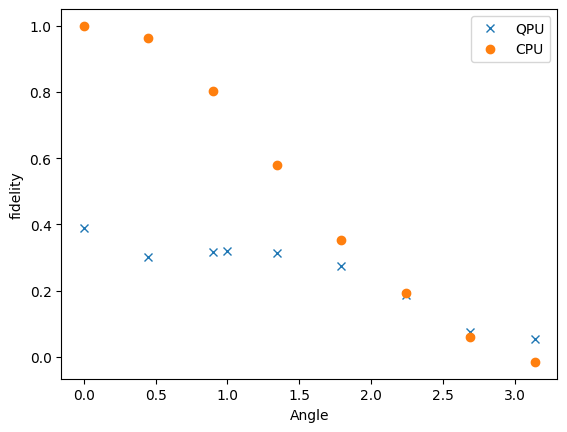

In [73]:
import matplotlib.pyplot as plt
plt.plot(angles, fidelities_QPU, 'x', label='QPU')
plt.plot(angles2, fidelities_CPU, 'o', label = 'CPU')
plt.xlabel('Angle')
plt.ylabel('fidelity')
plt.legend()